In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
df = pd.read_json("shared_task_dev.jsonl", lines=True)
df.evidence[0]

[[[108548, None, None, None]]]

In [50]:
df

,id,verifiable,label,claim,evidence
0,91198,NOT VERIFIABLE,NOT ENOUGH INFO,Colin Kaepernick became a starting quarterback...,"[[[108548, None, None, None]]]"
1,194462,NOT VERIFIABLE,NOT ENOUGH INFO,Tilda Swinton is a vegan.,"[[[227768, None, None, None]]]"
2,137334,VERIFIABLE,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,"[[[289914, 283015, Soul_Food_-LRB-film-RRB-, 0..."
3,166626,NOT VERIFIABLE,NOT ENOUGH INFO,Anne Rice was born in New Jersey.,"[[[191656, None, None, None], [191657, None, N..."
4,111897,VERIFIABLE,REFUTES,Telemundo is a English-language television net...,"[[[131371, 146144, Telemundo, 0]], [[131371, 1..."
...,...,...,...,...,...
19993,8538,VERIFIABLE,REFUTES,Hermit crabs are arachnids.,"[[[15450, 19262, Hermit_crab, 0], [15450, 1926..."
19994,145641,VERIFIABLE,REFUTES,Michael Hutchence died on a boat.,"[[[168967, 182663, Michael_Hutchence, 15]]]"
19995,87517,VERIFIABLE,SUPPORTS,The Cyclades are located to the southeast of G...,"[[[104709, 118125, Cyclades, 0]]]"
19996,111816,NOT VERIFIABLE,NOT ENOUGH INFO,Theresa May worked the docks.,"[[[131223, None, None, None]]]"


In [29]:
q = df.claim.tolist()
vect = CountVectorizer()
vec = vect.fit_transform(q)

In [30]:
len(vect.vocabulary_.keys())

9668

In [31]:
def removeList(a):
    return a[0]

In [32]:
a = Counter()
for row in df.iterrows():
    if(row[1].to_list()[2] != "NOT ENOUGH INFO"):
        b = len(row[1].to_list()[4])
        a[b] += 1
print(a.most_common())

[(1, 9682), (2, 1675), (3, 561), (4, 391), (5, 346), (6, 200), (7, 122), (8, 94), (9, 56), (10, 38), (11, 35), (12, 25), (13, 20), (14, 15), (20, 12), (17, 8), (16, 8), (21, 5), (15, 5), (23, 4), (19, 3), (18, 3), (27, 3), (25, 3), (24, 2), (44, 2), (26, 1), (38, 1), (32, 1), (74, 1), (39, 1), (22, 1), (53, 1), (29, 1), (41, 1), (45, 1), (73, 1), (33, 1), (71, 1), (116, 1)]


In [33]:
l = list(zip(*(sorted(a.items()))))

k, v = list(l[0]), list(l[1])

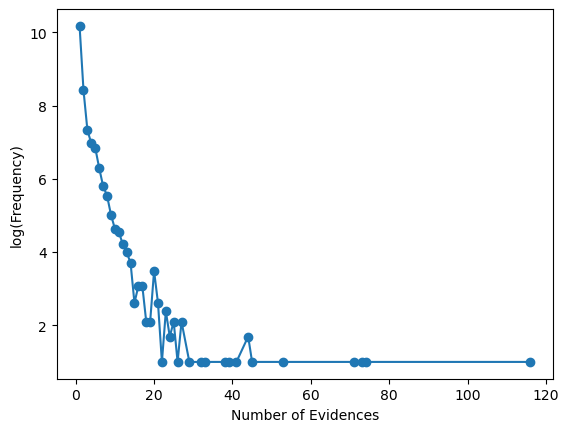

In [34]:
ax = plt.subplot()
ax.set_ylabel("log(Frequency)")
ax.set_xlabel("Number of Evidences")
ax = plt.plot(k, np.log(v) + 1, "-o")
plt.show()

In [35]:
s = df.label.value_counts()
x, y = s.to_list(), s.index.to_list()
print(x)
print(y)
y = ['SUPPORTS', 'NOT ENOUGH INFO', 'REFUTES']

[6666, 6666, 6666]
['NOT ENOUGH INFO', 'SUPPORTS', 'REFUTES']


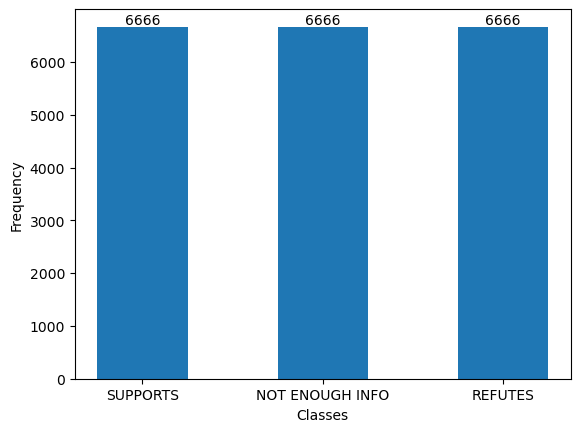

In [36]:
ax = plt.subplot()
ax.set_ylabel("Frequency")
ax.set_xlabel("Classes")
ax = plt.bar(y, x, width=0.5)

for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

In [37]:
sup = df[df.label == "SUPPORTS"]
ref = df[df.label == "REFUTES"]
nei = df[df.label == "NOT ENOUGH INFO"]
nei.shape

(6666, 5)

In [38]:
data = []
cs = Counter()
csl = Counter()
for row in sup.iterrows():
    line = row[1].to_list()[3]
    words = re.findall(r"[\w']+", line)
    words = set(list(map(lambda x: x.lower(), words)))
    csl[len(words)] += 1
    cs.update(Counter(words))

In [39]:
s = cs["not"]
print(csl)

Counter({7: 1004, 8: 929, 6: 924, 5: 821, 9: 731, 10: 567, 11: 405, 4: 359, 12: 281, 13: 200, 14: 135, 3: 98, 15: 74, 16: 58, 17: 30, 18: 16, 19: 9, 20: 7, 2: 6, 21: 3, 23: 3, 26: 2, 25: 2, 31: 1, 22: 1})


In [40]:
cr = Counter()
crl = Counter()
for row in ref.iterrows():
    line = row[1].to_list()[3]
    words = re.findall(r"[\w']+", line)
    words = set(list(map(lambda x: x.lower(), words)))
    crl[len(words)] += 1
    cr.update(Counter(words))

In [41]:
r = cr["not"]
print(crl)

Counter({8: 1093, 7: 1028, 6: 1003, 9: 858, 10: 632, 5: 592, 11: 428, 12: 294, 4: 275, 13: 170, 14: 116, 15: 50, 16: 43, 3: 38, 17: 18, 18: 13, 19: 4, 20: 4, 24: 3, 21: 2, 26: 1, 23: 1})


In [42]:
cn = Counter()
cnl = Counter()
for row in nei.iterrows():
    line = row[1].to_list()[3]
    words = re.findall(r"[\w']+", line)
    words = set(list(map(lambda x: x.lower(), words)))
    cnl[len(words)] += 1
    cn.update(Counter(words))

In [43]:
n = cn["not"]
print(cnl)

Counter({7: 978, 6: 942, 8: 902, 5: 820, 9: 715, 10: 593, 11: 459, 12: 320, 4: 289, 13: 202, 14: 131, 15: 79, 16: 71, 3: 67, 17: 37, 19: 18, 18: 17, 21: 10, 20: 5, 22: 4, 24: 2, 26: 1, 25: 1, 23: 1, 27: 1, 2: 1})


In [44]:
h = [s, n, r]

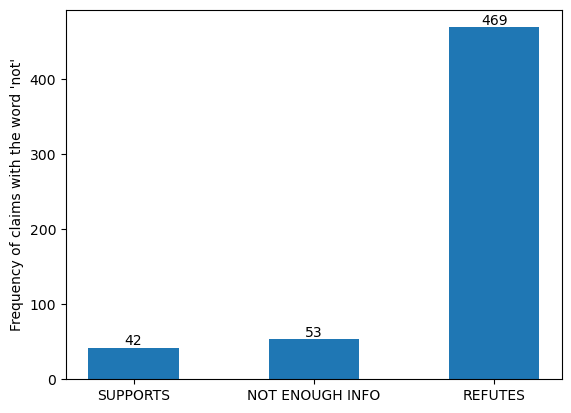

In [45]:
plt.ylabel("Frequency of claims with the word 'not'")
ax = plt.bar(y, h, width=0.5)

for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

In [46]:
a = Counter()
for row in sup.iterrows():
    b = len(row[1].to_list()[4])
    a[b] += 1
print(a.most_common())

[(1, 4834), (2, 822), (3, 273), (5, 213), (4, 207), (6, 105), (7, 57), (8, 45), (9, 23), (11, 15), (10, 12), (12, 11), (14, 7), (20, 7), (13, 6), (23, 3), (17, 3), (18, 3), (16, 3), (44, 2), (27, 2), (25, 2), (38, 1), (32, 1), (74, 1), (39, 1), (21, 1), (53, 1), (15, 1), (73, 1), (33, 1), (71, 1), (116, 1)]


In [47]:
a = Counter()
for row in ref.iterrows():
    b = len(row[1].to_list()[4])
    a[b] += 1
print(a.most_common())

[(1, 4848), (2, 853), (3, 288), (4, 184), (5, 133), (6, 95), (7, 65), (8, 49), (9, 33), (10, 26), (11, 20), (13, 14), (12, 14), (14, 8), (20, 5), (16, 5), (17, 5), (21, 4), (15, 4), (19, 3), (24, 2), (26, 1), (22, 1), (29, 1), (25, 1), (41, 1), (45, 1), (23, 1), (27, 1)]


In [48]:
a = Counter()
for row in nei.iterrows():
    b = len(row[1].to_list()[4])
    a[b] += 1
print(a.most_common())

[(1, 6666)]


In [49]:
j = Counter()
j.update(cs)
j.update(cr)
j.update(cn)
print(len(j.most_common()))

10081
